In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

2023-03-23 10:29:06.693625: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-23 10:29:06.764228: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-23 10:29:06.765819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 10:29:08.359458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

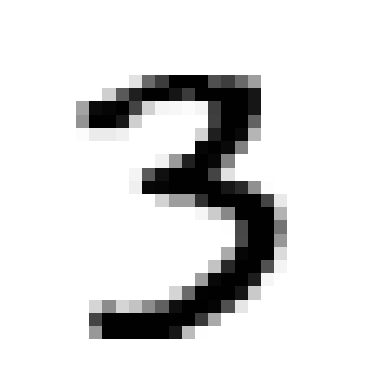

In [5]:
plt.imshow(X_train_full[10000],cmap='binary')
plt.axis("off")
plt.show()

<Axes: >

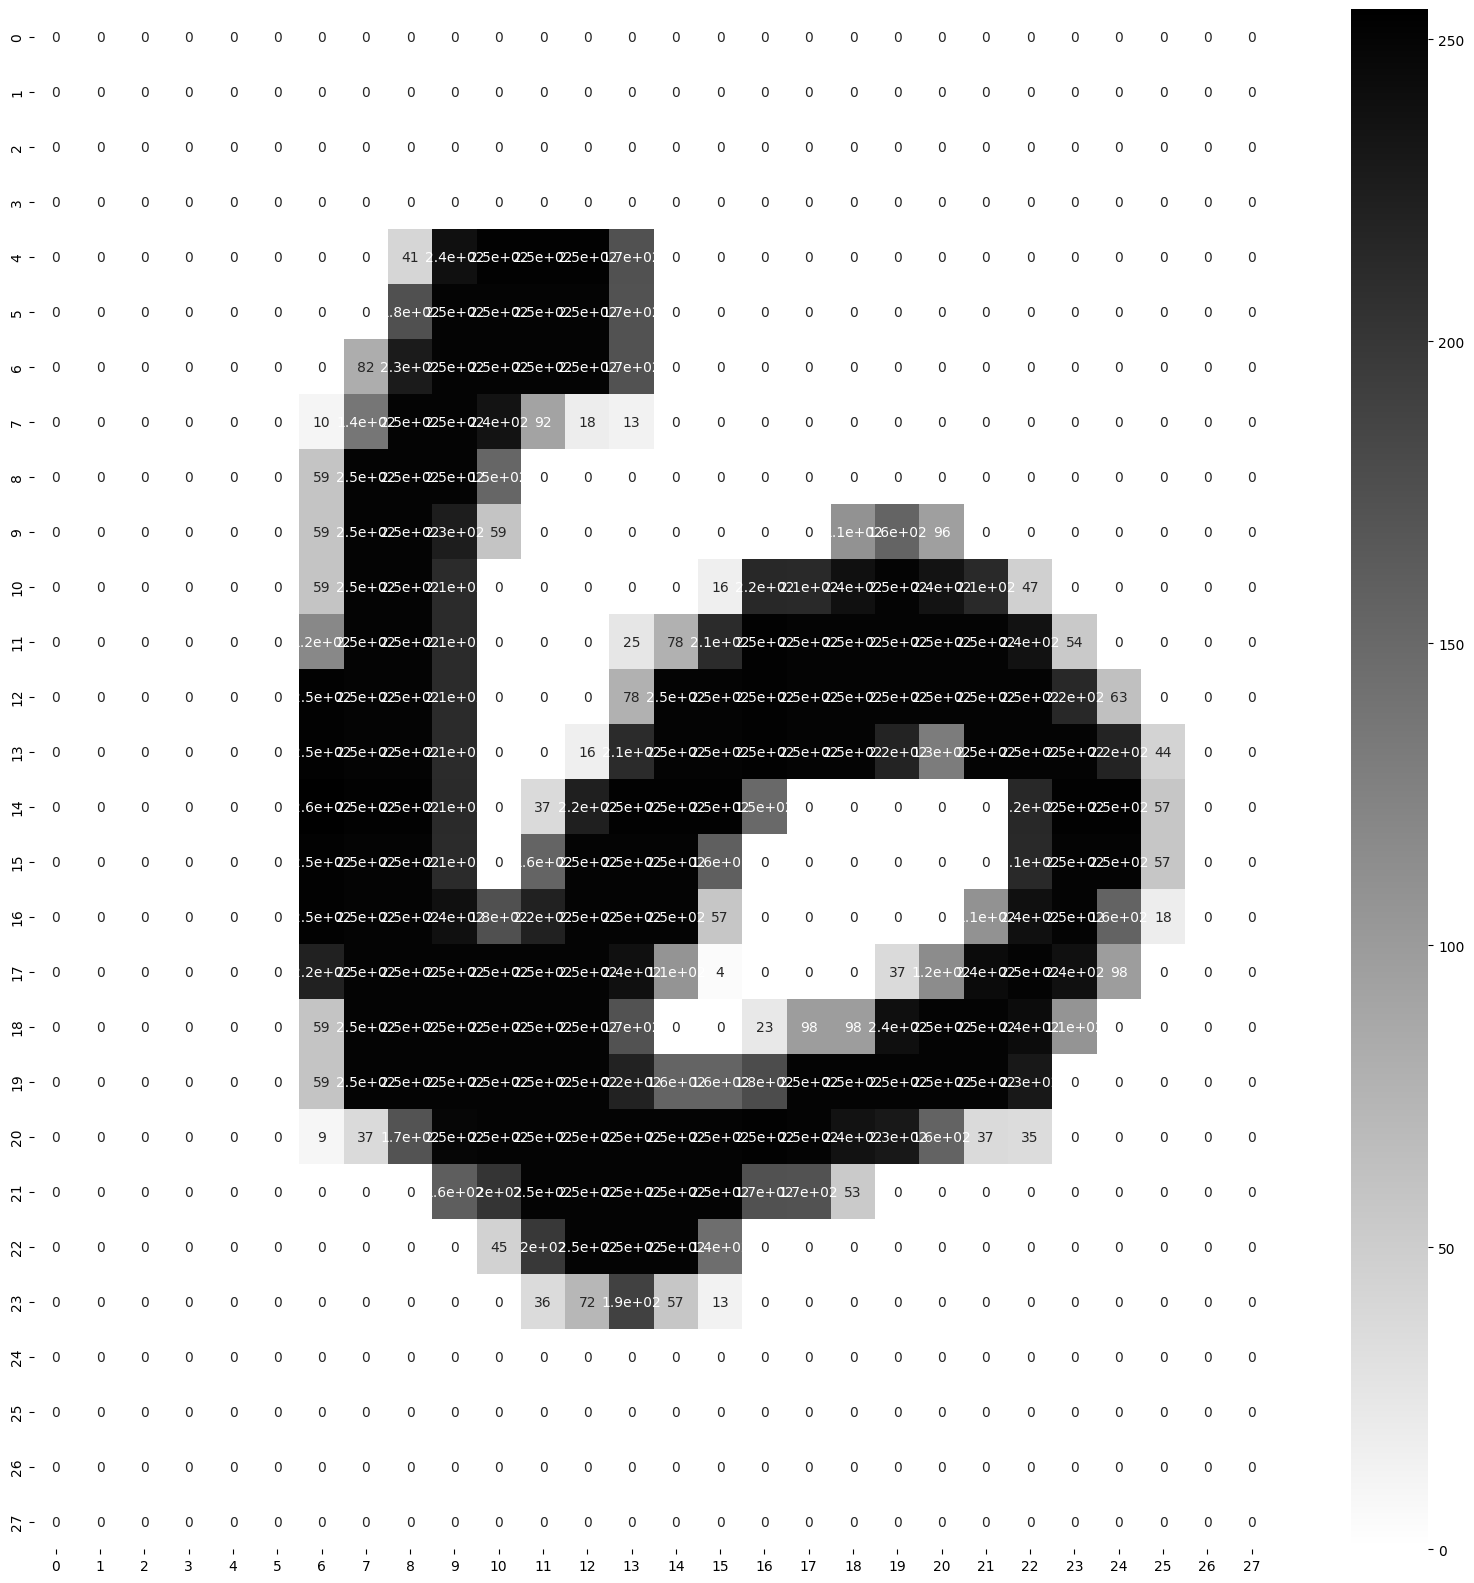

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[9000],annot=True,cmap="binary")

In [7]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# scale the test set as well
X_test = X_test / 255.

In [9]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)


(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


In [10]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [11]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [12]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [14]:
model_clf.layers[1].name

'hiddenlayer1'

In [15]:
hidden1=model_clf.layers[1]
weights,biases=hidden1.get_weights()
weights

array([[-0.02285643, -0.01841518,  0.06681028, ...,  0.07225877,
         0.0499265 , -0.00785269],
       [ 0.02111993,  0.0611877 ,  0.00603465, ...,  0.00848866,
        -0.02247973, -0.06969444],
       [-0.0079481 ,  0.06495483, -0.06120626, ...,  0.00380091,
        -0.02322852, -0.01400656],
       ...,
       [ 0.03349646,  0.0710963 , -0.01017858, ..., -0.06250559,
         0.06585355, -0.06916779],
       [-0.04617459, -0.02402931, -0.06787273, ..., -0.05202749,
        -0.00080452, -0.0388881 ],
       [-0.04173462, -0.02485212, -0.01737568, ..., -0.04471266,
         0.06745912,  0.02793361]], dtype=float32)

In [16]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2121 - accuracy: 0.9368 - val_loss: 0.1150 - val_accuracy: 0.9658
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9731 - val_loss: 0.0886 - val_accuracy: 0.9752
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0762 - val_accuracy: 0.9776
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0840 - val_accuracy: 0.9764
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0346 - accuracy: 0.9885 - val_loss: 0.0925 - val_accuracy: 0.9752


In [17]:
hidden1=model_clf.layers[1]
weights,biases=hidden1.get_weights()
weights

array([[-0.02285643, -0.01841518,  0.06681028, ...,  0.07225877,
         0.0499265 , -0.00785269],
       [ 0.02111993,  0.0611877 ,  0.00603465, ...,  0.00848866,
        -0.02247973, -0.06969444],
       [-0.0079481 ,  0.06495483, -0.06120626, ...,  0.00380091,
        -0.02322852, -0.01400656],
       ...,
       [ 0.03349646,  0.0710963 , -0.01017858, ..., -0.06250559,
         0.06585355, -0.06916779],
       [-0.04617459, -0.02402931, -0.06787273, ..., -0.05202749,
        -0.00080452, -0.0388881 ],
       [-0.04173462, -0.02485212, -0.01737568, ..., -0.04471266,
         0.06745912,  0.02793361]], dtype=float32)

In [18]:
import time 
import os
def saveModel_path(model_dir="SAVED_MODELS"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [19]:
model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_03_23_10_29_52_.h5


In [20]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [21]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.212091,0.936764,0.114962,0.9658
1,0.086650,0.973091,0.088610,0.9752
2,0.059686,0.980964,0.076237,0.9776
3,0.043894,0.986073,0.084004,0.9764
4,0.034585,0.988527,0.092546,0.9752


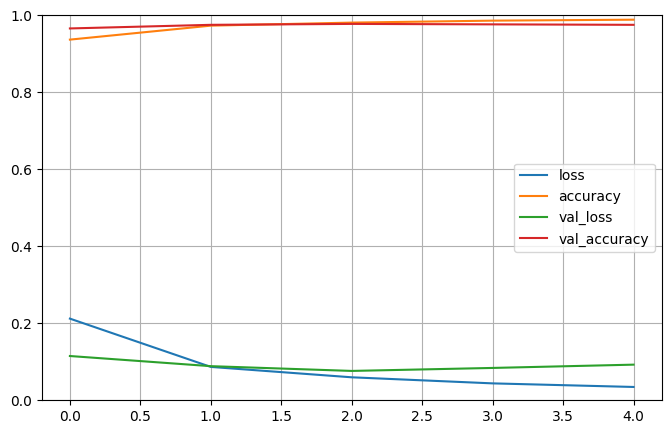

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model_clf.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9778


0.9778000116348267

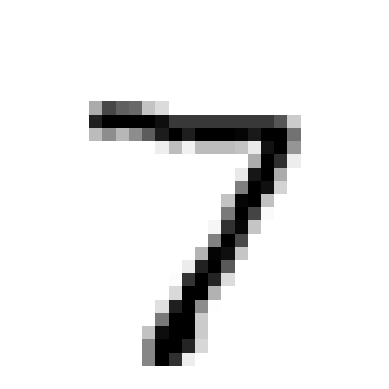

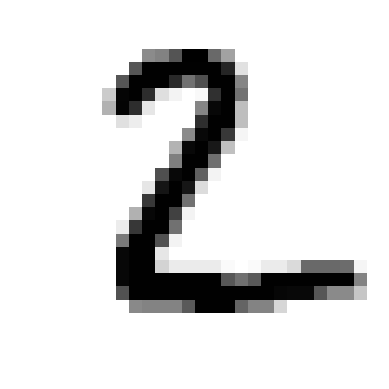

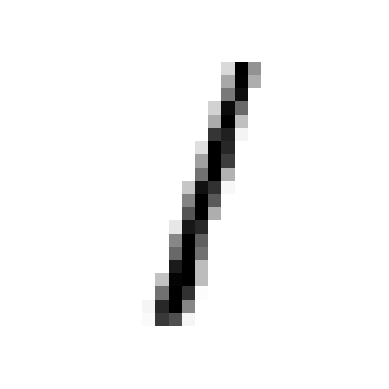

In [24]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()


In [25]:
prediction=model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 98ms/step


In [26]:
prediction

array([[4.8354834e-11, 4.8103388e-09, 3.0769861e-08, 1.0955863e-07,
        1.1542879e-12, 4.0640571e-11, 2.2470815e-13, 9.9999988e-01,
        3.4844316e-10, 7.9571816e-09],
       [8.5430187e-12, 3.4952901e-09, 1.0000000e+00, 4.5776927e-10,
        1.3077718e-17, 3.0267581e-12, 1.0200739e-14, 5.4313972e-14,
        2.1440077e-10, 2.6551785e-17],
       [1.5211404e-09, 9.9990928e-01, 6.8673976e-06, 3.0332961e-07,
        1.1813217e-05, 3.6760699e-08, 1.3762438e-07, 6.8997579e-05,
        2.5596842e-06, 4.2048310e-08]], dtype=float32)

In [27]:
y_prob=prediction[0]
np.argmax(y_prob.round(5))

7

In [28]:
y_prob=prediction[1]
np.argmax(y_prob)

2

In [29]:
model_clf.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[4.83551116e-11, 4.81034768e-09, 3.07700354e-08, ...,
        9.99999821e-01, 3.48444468e-10, 7.95721089e-09],
       [8.54303434e-12, 3.49530982e-09, 9.99999940e-01, ...,
        5.43141751e-14, 2.14401580e-10, 2.65519848e-17],
       [1.52114032e-09, 9.99909222e-01, 6.86739713e-06, ...,
        6.89975786e-05, 2.55968416e-06, 4.20483062e-08],
       ...,
       [6.03937827e-16, 2.48240511e-10, 2.59383747e-11, ...,
        3.96809807e-10, 8.23297786e-09, 2.03125552e-08],
       [1.88631597e-12, 3.65857483e-10, 8.80857106e-12, ...,
        1.18467369e-08, 1.18470205e-04, 7.21264506e-11],
       [1.90127269e-09, 8.00912392e-11, 1.33996925e-10, ...,
        2.41625220e-10, 4.72341055e-09, 4.19925339e-09]], dtype=float32)

In [34]:
from tensorflow.keras.models import load_model
model=load_model("/config/workspace/deep-learning/ANN/SAVED_MODELS/Model_2023_03_23_10_29_52_.h5")

In [35]:
#tensorboard
import time

def get_log_path(log_dir="logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")    
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at:\n{log_path}")
    return log_path

saving logs at:
logs/fit/log_2023_03_23_10_38_25


In [36]:
# 

log_dir = get_log_path()
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

saving logs at:
logs/fit/log_2023_03_23_10_39_46


In [37]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,callbacks=[tensorboard_callback])

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9907 - val_loss: 0.0790 - val_accuracy: 0.9792
Epoch 2/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0236 - accuracy: 0.9919 - val_loss: 0.0960 - val_accuracy: 0.9758
Epoch 3/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0943 - val_accuracy: 0.9782
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0176 - accuracy: 0.9941 - val_loss: 0.0949 - val_accuracy: 0.9780
Epoch 5/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0142 - accuracy: 0.9951 - val_loss: 0.1046 - val_accuracy: 0.9806


In [38]:
%load_ext tensorboard

In [39]:
%reload_ext tensorboard

In [54]:
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.